In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import datetime as dt
%matplotlib inline

In [80]:
data_station = pd.read_csv('example_sprit_cut_station.csv', delimiter = ',')
data_prices = pd.read_csv('example_sprit_cut_prices.csv', delimiter = ',')

In [81]:
data_prices['DATE'] = data_prices['DATE_CHANGED']
data_prices['DATE'] = pd.to_datetime(data_prices['DATE'])
data_prices['DATE'] = data_prices['DATE'].dt.date
data_prices['CHANGED1'] = data_prices['Unnamed: 6']
min(data_prices['DATE'])

datetime.date(2014, 6, 8)

In [82]:
data_station.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [83]:
data_prices.head()

,ID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,Unnamed: 6,DATE,CHANGED1
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02,05:22:01.000000,21,2014-10-02,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02,05:26:01.000000,21,2014-10-02,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02,09:06:01.000000,1,2014-10-02,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03,12:14:01.000000,21,2014-10-03,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03,14:14:01.000000,21,2014-10-03,21


In [84]:
data_final = pd.merge(data_prices,data_station, on='ID', how = 'inner')

In [85]:
data_final.tail()

,ID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,Unnamed: 6,DATE,CHANGED1,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
2097145,044b327b-8726-428a-867c-a48235121cf2,1339,1319,1119,2015-09-28,14:06:01.000000,21,2015-09-28,21,328,2014-11-03 11:29:35.000000,Rastatt Am Zubringer 6,OMV,Am Zubringer,6,76437,Rastatt,deBY,48.8598,8.2547
2097146,044b327b-8726-428a-867c-a48235121cf2,1359,1339,1149,2015-09-29,13:30:01.000000,21,2015-09-29,21,328,2014-11-03 11:29:35.000000,Rastatt Am Zubringer 6,OMV,Am Zubringer,6,76437,Rastatt,deBY,48.8598,8.2547
2097147,044b327b-8726-428a-867c-a48235121cf2,1359,1339,1149,2015-09-29,13:30:01.000000,21,2015-09-29,21,328,2014-11-03 11:29:35.000000,Rastatt Am Zubringer 6,OMV,Am Zubringer,6,76437,Rastatt,deBY,48.8598,8.2547
2097148,044b327b-8726-428a-867c-a48235121cf2,1339,1319,1119,2015-09-29,14:34:01.000000,21,2015-09-29,21,328,2014-11-03 11:29:35.000000,Rastatt Am Zubringer 6,OMV,Am Zubringer,6,76437,Rastatt,deBY,48.8598,8.2547
2097149,044b327b-8726-428a-867c-a48235121cf2,1339,1319,1119,2015-09-29,14:34:01.000000,21,2015-09-29,21,328,2014-11-03 11:29:35.000000,Rastatt Am Zubringer 6,OMV,Am Zubringer,6,76437,Rastatt,deBY,48.8598,8.2547


In [86]:
data_final.drop_duplicates(subset='ID', keep='first', inplace=False)

,ID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,Unnamed: 6,DATE,CHANGED1,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02,05:22:01.000000,21,2014-10-02,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
8466,d4d2ffc7-db50-4dc2-89a7-f10eb0d391b8,1579,1539,1389,2014-09-28,10:34:01.000000,21,2014-09-28,21,3,2013-08-23 04:34:47.000000,Aral Tankstelle,ARAL,Bischheimer Straße,9,67292,Kirchheimbolanden,\N,49.668570,8.020080
11030,f2d46ca3-641b-44c3-8fe5-3c047026973f,1309,1269,1169,2014-12-15,12:58:01.000000,1,2014-12-15,1,3,2013-08-23 04:34:47.000000,Aral Tankstelle,ARAL,Frankenthaler Straße,86,68307,Mannheim,\N,49.550114,8.449075
13034,51d4b69f-a095-1aa0-e100-80009459e03a,1559,1519,1359,2014-08-19,22:50:01.000000,21,2014-08-19,21,796,2015-09-28 21:00:33.000000,Supermarkt-Tankstelle LUDWIGSHAFEN OGGERSHEIM ...,Supermarkt-Tankstelle,ODERSTRASSE 2,\N,67071,LUDWIGSHAFEN OGGERSHEIM,\N,49.491300,8.355880
22562,eb39e146-8263-4093-835d-30c8073e2eb2,1399,1379,1139,2015-08-13,14:50:01.000000,21,2015-08-13,21,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,Shell,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197
28150,9aab1ae8-c032-4834-bee4-bb0227ec4e3f,0,0,1319,2014-12-14,22:02:01.000000,1,2014-12-14,1,1,2013-07-31 22:00:00.000000,EISENBERG ALFRED- NOBEL- ST.,Shell,ALFRED-NOBEL-STR. 2 A,NaN,67304,EISENBERG,\N,49.563500,8.082050
35226,c4c59cea-3b83-46d0-b783-134c25c65df7,1459,1439,1229,2015-06-15,16:58:01.000000,21,2015-06-15,21,1,2013-07-31 22:00:00.000000,NEUSTADT MUßBACHER LANDSTR. 16,Shell,MUßBACHER LANDSTR. 16,NaN,67433,Neustadt,\N,49.359600,8.151400
41974,22164fef-8f55-4c6e-9051-9e6bfc32c535,1329,1289,1199,2014-12-14,16:30:01.000000,63,2014-12-14,63,1,2013-07-31 22:00:00.000000,HOCHSTADT NEUSTADTER STR.2.,Shell,NEUSTADTER STR. 2,NaN,76879,Hochstadt,\N,49.239979,8.222378
48278,d366d4bb-f334-4a39-8d1e-008da3b3c9f7,1309,1269,1199,2014-12-15,16:22:01.000000,1,2014-12-15,1,3,2013-08-23 04:34:48.000000,Aral Tankstelle,ARAL,Rheinstraße,128,76870,Kandel,\N,49.085266,8.210204
50590,1db8c369-2742-4f18-a4cb-fcb536294636,1509,1469,1299,2014-09-12,14:30:01.000000,21,2014-09-12,21,4,2013-09-23 15:05:05.000000,Aral Tankstelle,ARAL,Friedrich-Ebert-Straße,12-14,68167,Mannheim,\N,49.496582,8.487706


In [87]:
data_final.describe()

,E5,E10,DIESEL,Unnamed: 6,CHANGED1,VERSION,LAT,LNG
count,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06
mean,1.437028e+03,1.407364e+03,1.245482e+03,1.871862e+01,1.871862e+01,1.440874e+02,4.931761e+01,8.198789e+00
std,1.946457e+02,1.966634e+02,1.062559e+02,7.971526e+00,7.971526e+00,2.820274e+02,2.479620e-01,2.795665e-01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.880079e+01,7.505350e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01,2.100000e+01,1.000000e+00,4.911630e+01,8.106810e+00
50%,1.459000e+03,1.429000e+03,1.229000e+03,2.100000e+01,2.100000e+01,4.000000e+00,4.935564e+01,8.307890e+00
75%,1.529000e+03,1.489000e+03,1.319000e+03,2.100000e+01,2.100000e+01,2.900000e+01,4.949658e+01,8.409490e+00
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01,6.300000e+01,8.810000e+02,4.979940e+01,8.499941e+00


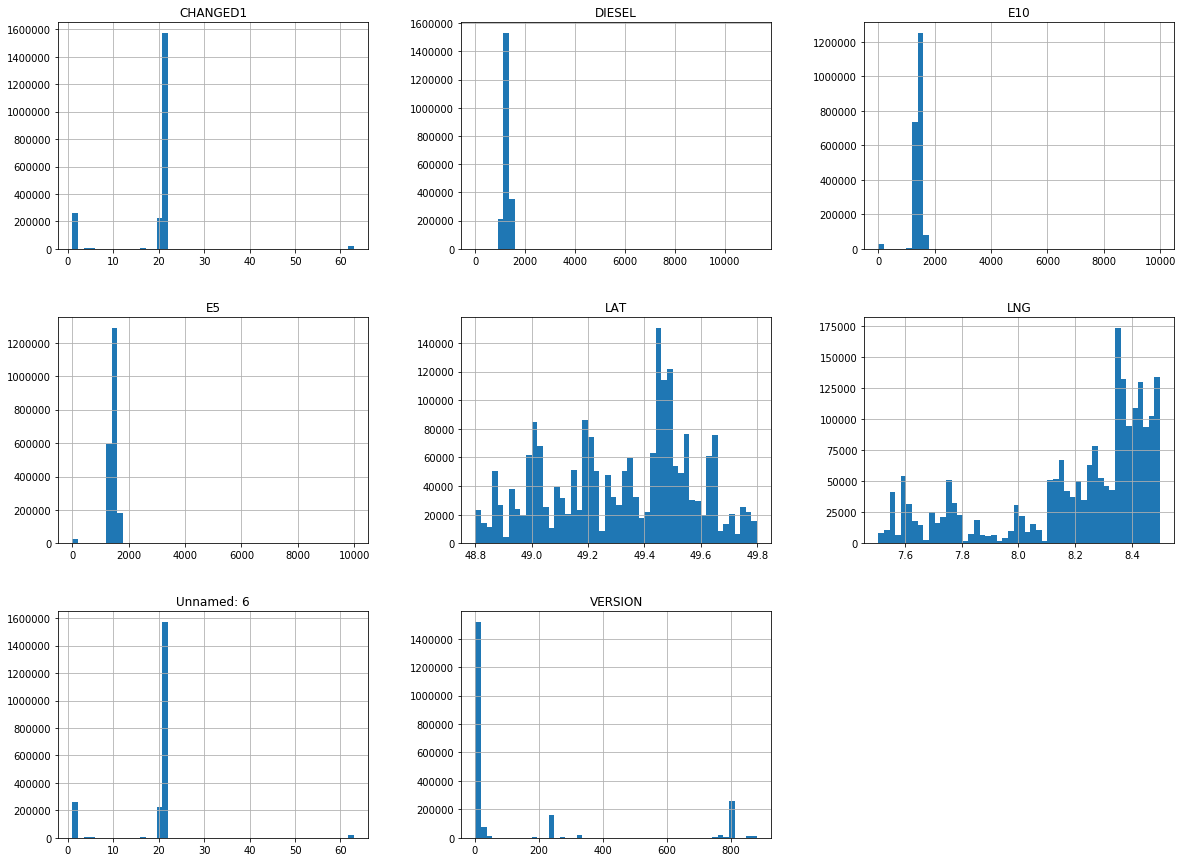

In [88]:
data_final.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

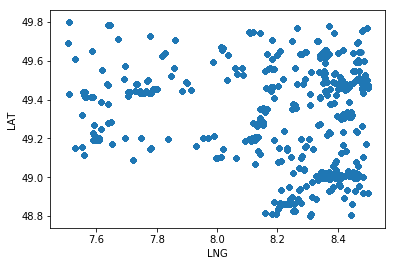

In [89]:
data_final.plot(kind="scatter", x="LNG", y="LAT", alpha=0.2)
plt.savefig('map1.png')
plt.show()

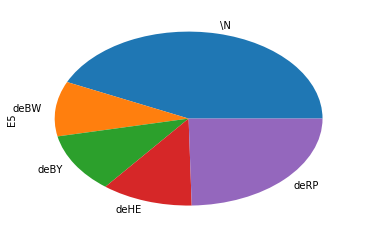

In [150]:
data_final.groupby('PUBLIC_HOLIDAY_IDENTIFIER')['E5'].nunique().plot(kind='pie')
plt.savefig('holidayvsE5.png')

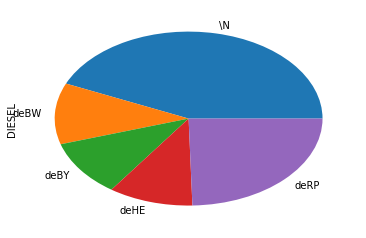

In [151]:
data_final.groupby('PUBLIC_HOLIDAY_IDENTIFIER')['DIESEL'].nunique().plot(kind='pie')
plt.savefig('holidayvsdiesel.png')

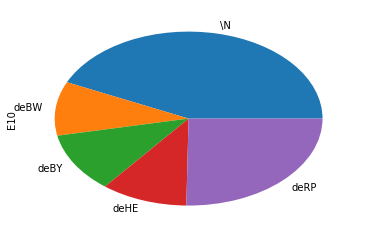

In [92]:
data_final.groupby('PUBLIC_HOLIDAY_IDENTIFIER')['E10'].nunique().plot(kind='pie')

In [93]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097150 entries, 0 to 2097149
Data columns (total 20 columns):
ID                           object
E5                           int64
E10                          int64
DIESEL                       int64
DATE_CHANGED                 object
CHANGED                      object
Unnamed: 6                   int64
DATE                         object
CHANGED1                     int64
VERSION                      int64
VERSION_TIME                 object
NAME                         object
BRAND                        object
STREET                       object
HOUSE_NUMBER                 object
POST_CODE                    object
PLACE                        object
PUBLIC_HOLIDAY_IDENTIFIER    object
LAT                          float64
LNG                          float64
dtypes: float64(2), int64(6), object(12)
memory usage: 336.0+ MB


In [94]:
X = data_final.loc[:,'VERSION':'VERSION']
Y = data_final.loc[:,'E5':'E5']

In [95]:
data_final.shape

(2097150, 20)

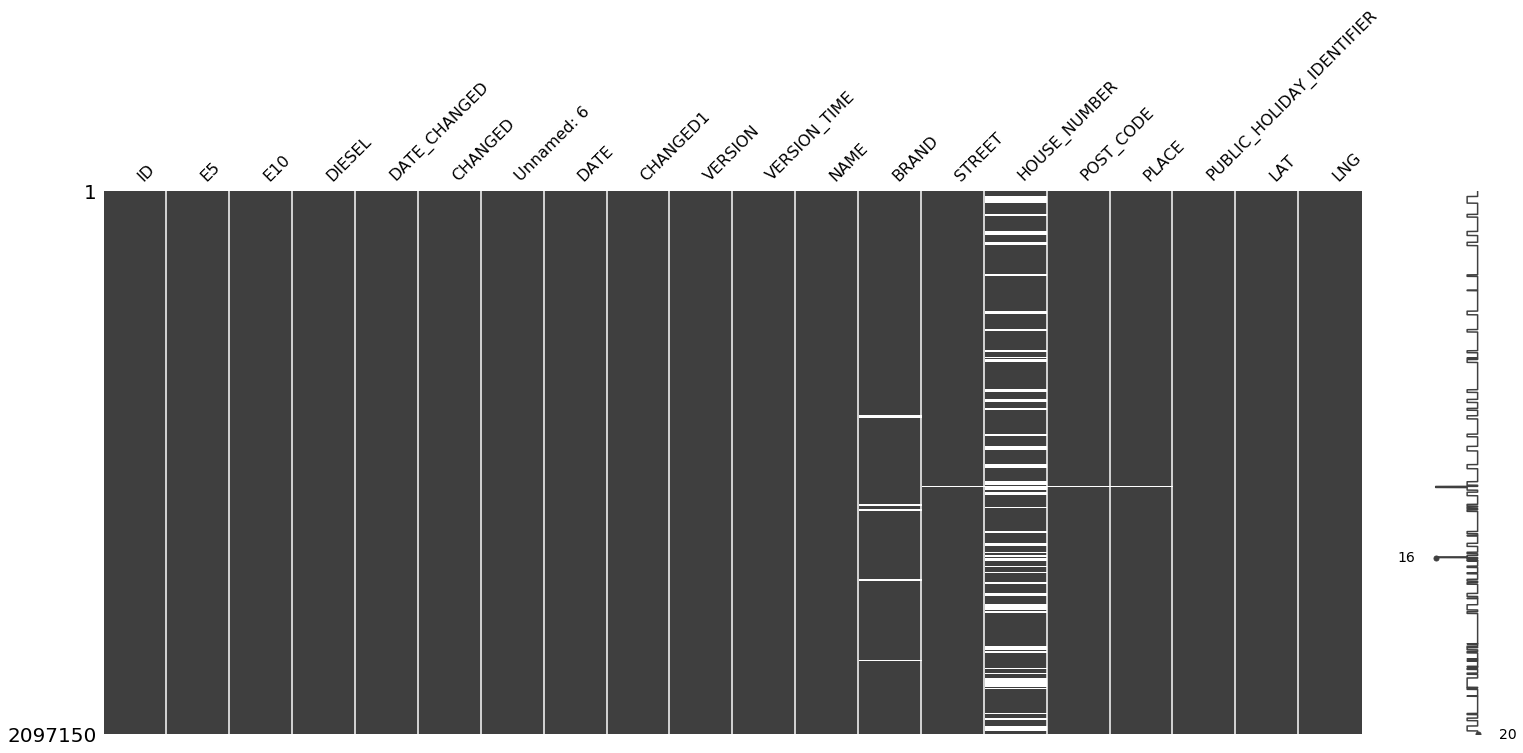

In [96]:
ms.matrix(data_final)

In [97]:
data_final['BRAND'].value_counts()

Shell                                                 366214
ARAL                                                  307978
AVIA                                                  244878
ESSO                                                  226826
JET                                                   184034
Total                                                 179712
BFT                                                    61064
Supermarkt-Tankstelle am real- Markt                   51632
Agip                                                   44422
HEM                                                    30500
OMV                                                    27704
bft                                                    26498
Supermarkt-Tankstelle                                  23398
T                                                      23218
OIL!                                                   21176
Tankcenter                                             20612
SB                      

In [98]:
brand_groups = data_final.groupby('BRAND')
brand_groups.size()

BRAND
ARAL                                                  307978
AUTO ZOTZ Herxheim b.LD.       Tanken an L.493          2324
AUTO ZOTZ Landau in der Pfalz   Tanken und waschen      4274
AVIA                                                  244878
Agip                                                   44422
BFT                                                    61064
Bft                                                     4600
CLASSIC                                                 5736
E Center                                                5752
ED                                                     13310
ELAN                                                    6964
ESSO                                                  226826
Eberhardt Jöhlingen                                     1876
Freie                                                  10424
Freie Tankstelle                                       11846
Fritz Walter GmbH                                       5420
Frühmesser GmbH   

In [99]:
brands_total = brand_groups.sum()
brands_total.sort_values('E5').head(20)

,E5,E10,DIESEL,Unnamed: 6,CHANGED1,VERSION,LAT,LNG
BRAND,,,,,,,,
nicht mehr aktiv,28062,27462,24282,966,966,12420,989.706220,168.289978
frei,228274,224280,196240,4548,4548,3040,7822.086384,1318.864000
Raiffeisen,273986,-174,1322188,2752,2752,5360,53278.723851,8841.650605
Winkler,310792,303492,266894,4626,4626,1140,11282.342677,1801.206325
Schiffer & Nicklaus GmbH,521698,511658,796010,7740,7740,3250,32214.752828,5311.453151
TS ARNT,551088,539808,468068,8434,8434,8624,19499.977280,3287.888240
rnt,1132190,1102686,986146,18286,18286,12704,39162.953486,6706.462244
TOTAL,2717256,2665896,2356176,36732,36732,155208,88150.490462,14878.774080
Eberhardt Jöhlingen,2776550,2722594,2401622,43022,43022,30016,91860.611836,15766.421588


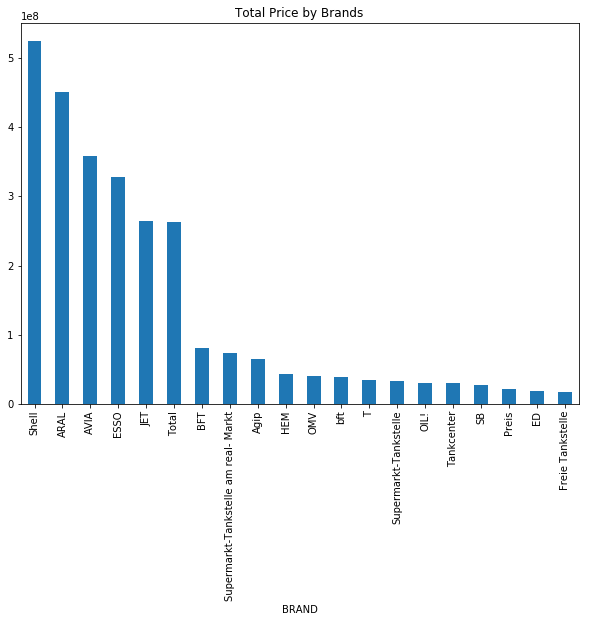

In [100]:
brands_plots = brands_total['E5'].sort_values(ascending=False).head(20).plot(kind='bar',figsize=(10,7),title="Total Price by Brands")
#plt.savefig('plots/brandse5.png')

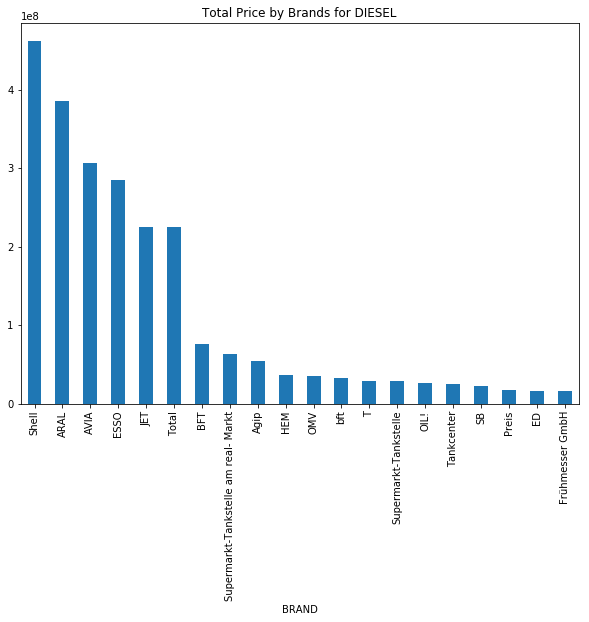

In [101]:
brands_plots = brands_total['DIESEL'].sort_values(ascending=False).head(20).plot(kind='bar',figsize=(10,7),title="Total Price by Brands for DIESEL")

In [102]:
monthly['E5'].plot(c='r',figsize=(10,7),title="Monthly Gasoline Price Changes")
monthly['E10'].plot(c='g',figsize=(10,7),title="Monthly Gasoline Price Changes")
monthly['DIESEL'].plot(c='b',figsize=(10,7),title="Monthly Gasoline Price Changes")
plt.legend()

NameError: name 'monthly' is not defined

In [103]:
data_final1=data_final.set_index(pd.DatetimeIndex(data_final['DATE']))
data_final1.drop(['ID','DATE_CHANGED','VERSION','VERSION_TIME','NAME','BRAND','STREET','PUBLIC_HOLIDAY_IDENTIFIER'],axis=1,inplace=True)
data_final1.head(10)
data_final1.drop(data_final1[data_final1.DIESEL < 0].index, inplace=True)
data_final1.drop(data_final1[data_final1.E5 < 0].index, inplace=True)
data_final1.drop(data_final1[data_final1.E10 < 0].index, inplace=True)
data_final1.head(10)

,E5,E10,DIESEL,CHANGED,Unnamed: 6,DATE,CHANGED1,HOUSE_NUMBER,POST_CODE,PLACE,LAT,LNG
DATE,,,,,,,,,,,,
2014-10-02,1589,1549,1389,05:22:01.000000,21,2014-10-02,21,,67551,WORMS,49.633409,8.273847
2014-10-02,1589,1549,1389,05:22:01.000000,21,2014-10-02,21,,67551,WORMS,49.633409,8.273847
2014-10-02,1569,1529,1369,05:26:01.000000,21,2014-10-02,21,,67551,WORMS,49.633409,8.273847
2014-10-02,1569,1529,1369,05:26:01.000000,21,2014-10-02,21,,67551,WORMS,49.633409,8.273847
2014-10-02,1569,1529,1359,09:06:01.000000,1,2014-10-02,1,,67551,WORMS,49.633409,8.273847
2014-10-02,1569,1529,1359,09:06:01.000000,1,2014-10-02,1,,67551,WORMS,49.633409,8.273847
2014-10-03,1539,1499,1339,12:14:01.000000,21,2014-10-03,21,,67551,WORMS,49.633409,8.273847
2014-10-03,1539,1499,1339,12:14:01.000000,21,2014-10-03,21,,67551,WORMS,49.633409,8.273847
2014-10-03,1529,1489,1329,14:14:01.000000,21,2014-10-03,21,,67551,WORMS,49.633409,8.273847


In [104]:
price_changed_group=data_final.groupby(['BRAND','CHANGED1']).sum()
price_changed_group.head(50)

E5  \
BRAND                                              CHANGED1              
ARAL                                               1          36600736   
                                                   2              5716   
                                                   3              5716   
                                                   4             20046   
                                                   5            102928   
                                                   16            44748   
                                                   20         32668498   
                                                   21        380566666   
                                                   42                0   
                                                   60             5596   
                                                   63          1346410   
AUTO ZOTZ Herxheim b.LD.       Tanken an L.493     1            362560   
                                                   4              6276   
                                                   5             11340   
                                                   17            17956   
                                                   20           379704   
                                                   21          2398050   
                                                   63           162746   
AUTO ZOTZ Landau in der Pfalz   Tanken und waschen 1            356764   
                                                   4              8938   
                                                   5             25418   
                                                   16            30854   
                                                   17             9430   
                                                   20           509940   
                                                   21          4844102   
                                                   63           319676   
AVIA                                               1          45126946   
                                                   4            862266   
                                                   5           1647540   
                                                   16          1739040   
                                                   17           646718   
                                                   20         42866704   
                                                   21        262045170   
                                                   63          2876740   
Agip                                               1           6788508   
                                                   2             11152   
                                                   4              3038   
                                                   5              5636   
                                                   16             5636   
                                                   17             3038   
                                                   20          5470756   
                                                   21         50895642   
                                                   23             6036   
                                                   63          1098626   
BFT                                                1           8555906   
                                                   3                 0   
                                                   4            480670   
                                                   5           1178034   
                                                   8                 0   
                                                   16           477568   

                                                                   E10  \
BRAND                                              CHANGED1              
ARAL                                               1          35907096 

In [114]:
data_final.head()

,ID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,Unnamed: 6,DATE,CHANGED1,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02,05:22:01.000000,21,2014-10-02,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02,05:22:01.000000,21,2014-10-02,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02,05:26:01.000000,21,2014-10-02,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02,05:26:01.000000,21,2014-10-02,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02,09:06:01.000000,1,2014-10-02,1,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847


In [131]:
data_final.drop(['Unnamed: 6'],axis=1,inplace = True)

In [132]:
data_final.head()

,E5,E10,DIESEL,DATE_CHANGED,DATE,CHANGED1,VERSION,NAME,BRAND,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,1589,1549,1389,2014-10-02,2014-10-02,21,12,Esso Tankstelle,ESSO,67551,WORMS,\N,49.633409,8.273847
1,1589,1549,1389,2014-10-02,2014-10-02,21,12,Esso Tankstelle,ESSO,67551,WORMS,\N,49.633409,8.273847
2,1569,1529,1369,2014-10-02,2014-10-02,21,12,Esso Tankstelle,ESSO,67551,WORMS,\N,49.633409,8.273847
3,1569,1529,1369,2014-10-02,2014-10-02,21,12,Esso Tankstelle,ESSO,67551,WORMS,\N,49.633409,8.273847
4,1569,1529,1359,2014-10-02,2014-10-02,1,12,Esso Tankstelle,ESSO,67551,WORMS,\N,49.633409,8.273847


In [133]:
data_final.groupby('DATE_CHANGED')

In [134]:
data_final.head()

,E5,E10,DIESEL,DATE_CHANGED,DATE,CHANGED1,VERSION,NAME,BRAND,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,1589,1549,1389,2014-10-02,2014-10-02,21,12,Esso Tankstelle,ESSO,67551,WORMS,\N,49.633409,8.273847
1,1589,1549,1389,2014-10-02,2014-10-02,21,12,Esso Tankstelle,ESSO,67551,WORMS,\N,49.633409,8.273847
2,1569,1529,1369,2014-10-02,2014-10-02,21,12,Esso Tankstelle,ESSO,67551,WORMS,\N,49.633409,8.273847
3,1569,1529,1369,2014-10-02,2014-10-02,21,12,Esso Tankstelle,ESSO,67551,WORMS,\N,49.633409,8.273847
4,1569,1529,1359,2014-10-02,2014-10-02,1,12,Esso Tankstelle,ESSO,67551,WORMS,\N,49.633409,8.273847


In [136]:
## Remove all extra columns and get the final features
ndf=data_final.set_index(pd.DatetimeIndex(data_final['DATE']))
ndf.drop(['ID','DATE_CHANGED','VERSION','VERSION_TIME','STREET','PUBLIC_HOLIDAY_IDENTIFIER'],axis=1,inplace=True)
ndf.head(10)

ValueError: labels ['ID' 'VERSION_TIME' 'STREET'] not contained in axis

In [138]:
ndf.drop(['DATE_CHANGED','VERSION','PUBLIC_HOLIDAY_IDENTIFIER'],axis=1,inplace=True)

In [139]:
ndf.head()

,E5,E10,DIESEL,DATE,CHANGED1,NAME,BRAND,POST_CODE,PLACE,LAT,LNG
DATE,,,,,,,,,,,
2014-10-02,1589,1549,1389,2014-10-02,21,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1589,1549,1389,2014-10-02,21,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1569,1529,1369,2014-10-02,21,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1569,1529,1369,2014-10-02,21,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847
2014-10-02,1569,1529,1359,2014-10-02,1,Esso Tankstelle,ESSO,67551,WORMS,49.633409,8.273847


In [140]:
ndf.drop(ndf[ndf.DIESEL < 0].index, inplace=True)
ndf.drop(ndf[ndf.E5 < 0].index, inplace=True)
ndf.drop(ndf[ndf.E10 < 0].index, inplace=True)

In [143]:
price_changed_group=ndf.groupby(['BRAND','CHANGED1']).sum()
price_changed_group.head(50)

E5     E10  \
BRAND                                              CHANGED1                   
ARAL                                               1          21272   21272   
                                                   2              4       4   
                                                   3              4       4   
                                                   4             12      12   
                                                   5             60      60   
                                                   16            26      26   
                                                   20         18894   18894   
                                                   21        220402  220402   
                                                   42             0       0   
                                                   60             4       4   
                                                   63           902     902   
AUTO ZOTZ Herxheim b.LD.       Tanken an L.493     1            210     210   
                                                   5              8       8   
                                                   17            12      12   
                                                   20           208     208   
                                                   21          1422    1422   
                                                   63            12      12   
AUTO ZOTZ Landau in der Pfalz   Tanken und waschen 1            238     238   
                                                   4              4       4   
                                                   5             18      18   
                                                   16            18      18   
                                                   17             2       2   
                                                   20           300     300   
                                                   21          2898    2898   
                                                   63            20      20   
AVIA                                               1          27008   27008   
                                                   4            510     510   
                                                   5           1096    1096   
                                                   16          1176    1176   
                                                   17           358     358   
                                                   20         25622   25622   
                                                   21        149710  149710   
                                                   63           456     456   
Agip                                               1           4060    4060   
                                                   2              8       8   
                                                   4              2       2   
                                                   5              4       4   
                                                   16             4       4   
                                                   17             2       2   
                                                   20          3116    3116   
                                                   21         29322   29322   
                                                   23             4       4   
                                                   63           204     204   
BFT                                                1           4956    4956   
                                                   3              0       0   
                                                   4            244     244   
                                                   5            226     226   
                                                   16           296     296   
                                                   17           152     152   
                                    

In [144]:
daily = ndf.resample(rule='D').mean()
daily.head()

,E5,E10,DIESEL,CHANGED1,LAT,LNG
DATE,,,,,,
2014-08-16,0.989107,0.989107,1.000000,18.333878,49.278263,8.216538
2014-08-17,0.990901,0.990901,1.000000,18.988171,49.290473,8.192488
2014-08-18,0.981498,0.981498,1.000000,17.817181,49.299383,8.209456
2014-08-19,0.982944,0.982944,1.000000,19.096948,49.311225,8.216322
2014-08-20,0.986774,0.986774,0.999528,17.996221,49.278896,8.238834


In [145]:
monthly = ndf.resample(rule='M').mean()
monthly.shape

(14, 6)

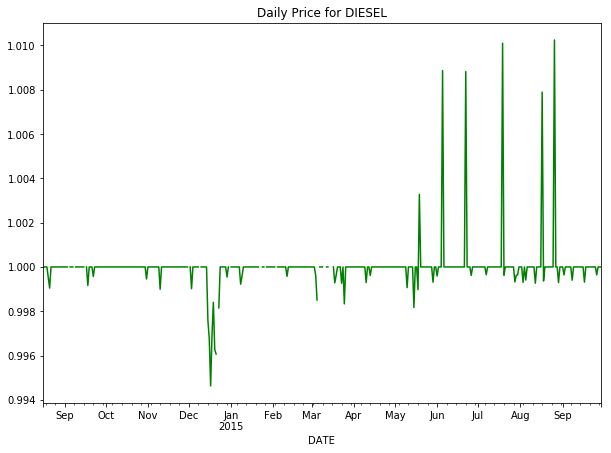

In [152]:
daily['DIESEL'].plot(c='g',figsize=(10,7),title="Daily Price for DIESEL")
plt.savefig('Dieselprice.png')

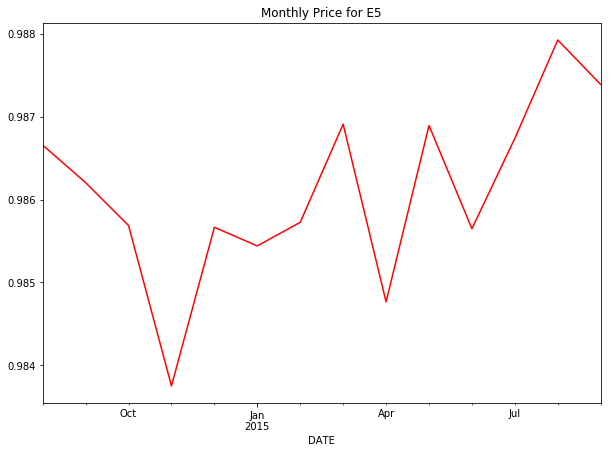

In [147]:
monthly['E5'].plot(c='r',figsize=(10,7),title="Monthly Price for E5")

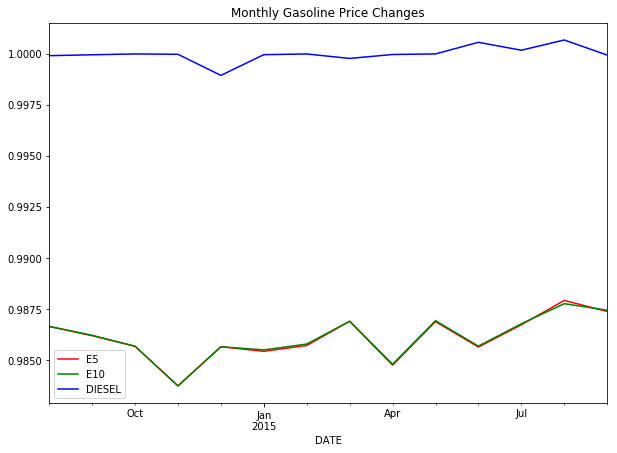

In [153]:
monthly['E5'].plot(c='r',figsize=(10,7),title="Monthly Gasoline Price Changes")
monthly['E10'].plot(c='g',figsize=(10,7),title="Monthly Gasoline Price Changes")
monthly['DIESEL'].plot(c='b',figsize=(10,7),title="Monthly Gasoline Price Changes")
plt.legend()
plt.savefig('price_changes.png')

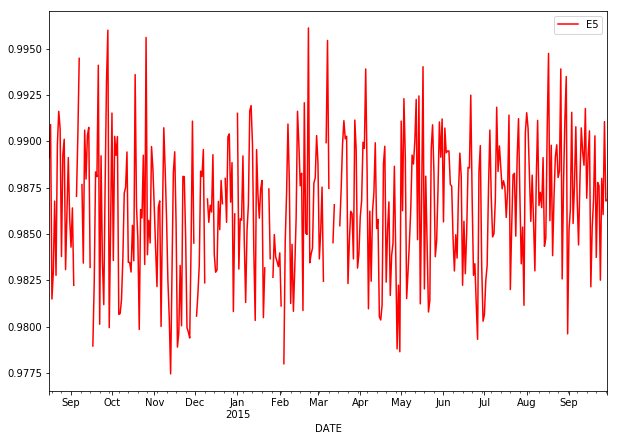

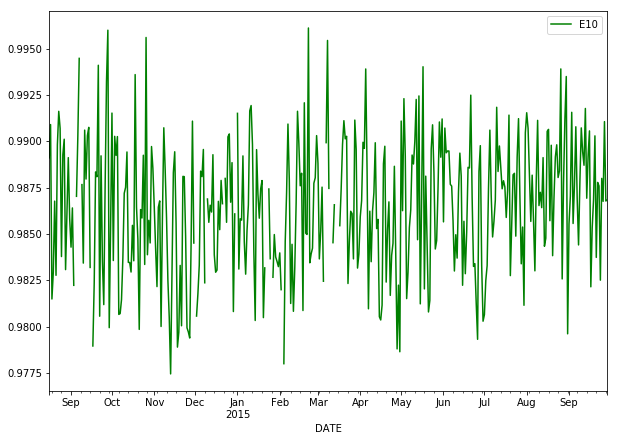

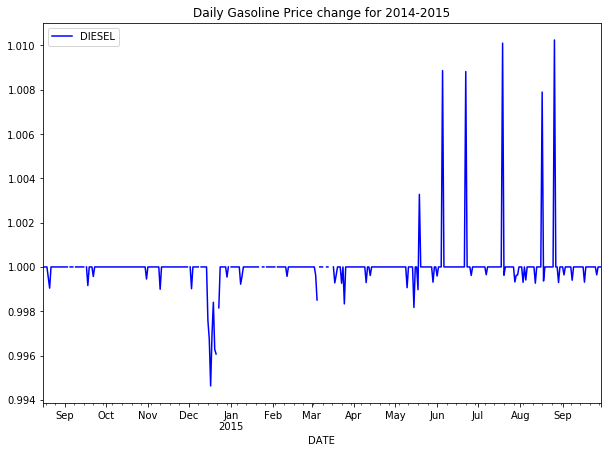

In [156]:
daily.plot(x=daily.index, y='E5', kind='line', c='r',figsize=(10,7))
daily.plot(x=daily.index, y='E10', kind='line', c='g',figsize=(10,7))
daily.plot(x=daily.index, y='DIESEL', kind='line', c='b',figsize=(10,7),title="Daily Gasoline Price change for 2014-2015")
plt.savefig('daily_all_prices.png')

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ndf.drop(['E5','E10','DIESEL'],axis=1), 
                                                    ndf['DIESEL'], test_size=0.30, 
                                                    random_state=101)

In [163]:
X_train

,DATE,CHANGED1,NAME,BRAND,POST_CODE,PLACE,LAT,LNG
DATE,,,,,,,,
2015-06-10,2015-06-10,1,Esso Tankstelle,ESSO,76744,WOERTH,49.047016,8.271659
2015-07-05,2015-07-05,21,Esso Tankstelle,ESSO,76829,LANDAU,49.195460,8.106190
2015-05-11,2015-05-11,21,Aral Tankstelle,ARAL,76532,Baden-Baden,48.811200,8.195391
2015-05-05,2015-05-05,21,Esso Tankstelle,ESSO,67434,NEUSTADT,49.350236,8.142207
2015-02-12,2015-02-12,21,Tankstelle Heinz,Tankstelle Heinz,76189,Karlsruhe,49.008991,8.327440
2015-03-22,2015-03-22,21,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,68169,MANNHEIM,49.508962,8.467691
2014-10-30,2014-10-30,21,Sueleyman Inci,Markant,76187,Karlsruhe,49.029040,8.347340
2015-08-26,2015-08-26,20,Esso Tankstelle,ESSO,67063,LUDWIGSHAFEN,49.503523,8.412235
2014-11-15,2014-11-15,1,MANNHEIM - UNTERMUEHLAUSTR. 105-107,Agip,68169,Mannheim,49.510755,8.469932


In [164]:
y_train

DATE
2015-06-10    1
2015-07-05    1
2015-05-11    1
2015-05-05    1
2015-02-12    1
2015-03-22    1
2014-10-30    1
2015-08-26    1
2014-11-15    1
2014-12-02    1
2014-08-26    1
2015-09-28    1
2015-03-18    1
2015-01-13    1
2015-07-15    1
2015-02-06    1
2015-05-04    1
2015-06-18    1
2015-03-15    1
2015-06-27    1
2015-07-03    1
2015-09-16    1
2015-07-30    1
2015-03-02    1
2015-09-19    1
2014-11-28    1
2015-09-07    1
2015-08-14    1
2015-06-12    1
2015-05-21    1
             ..
2014-12-30    1
2015-02-27    1
2015-06-03    1
2014-09-29    1
2014-10-22    1
2014-11-15    1
2015-07-31    1
2014-08-28    1
2015-02-16    1
2015-03-28    1
2015-04-06    1
2015-05-23    1
2015-01-03    1
2014-12-06    1
2015-07-14    1
2015-07-25    1
2015-09-04    1
2015-06-17    1
2015-09-19    1
2014-10-10    1
2015-03-19    1
2015-09-04    1
2015-05-15    1
2014-11-26    1
2015-05-30    1
2015-05-02    1
2015-07-15    1
2015-02-25    1
2015-09-03    1
2014-12-17    1
Name: DIESEL, Lengt

In [165]:
prices = ndf['DIESEL'].tolist()
dates = ndf.index.to_julian_date().tolist()

 
#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

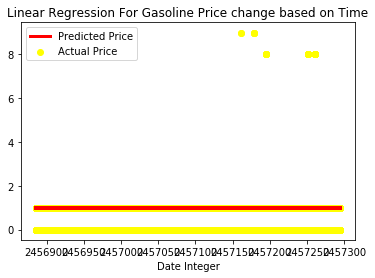

(-11.89487757960878, 5.2423901226845978e-06, -11.894930003510007)


In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime

## create a regression model ##
e5_price_model_regression = LinearRegression()
e5_price_model_regression.fit(dates, prices)

#V isualize Results
plt.scatter(dates, prices, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(dates, e5_price_model_regression.predict(dates), color='red', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression For Gasoline Price change based on Time')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

#Predict Price on Given Date
date = 10
predicted_price =e5_price_model_regression.predict(date)
print(predicted_price[0][0],e5_price_model_regression.coef_[0][0] ,e5_price_model_regression.intercept_[0])